<a href="https://colab.research.google.com/github/Karla-Flores/Project-04/blob/main/Model/Chicago_Crime_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preprocessing**

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving chicago_crime_db.csv to chicago_crime_db.csv


In [6]:
# Uploading ETL file
data = pd.read_csv('chicago_crime_db.csv')
data.head(5)

,Primary Type,Arrest,Domestic,Latitude,Longitude,Location Description,HOUR,SEASON
0,BATTERY,False,True,41.815117,-87.670000,RESIDENCE,Afternoon,Autumn
1,THEFT,False,False,41.895080,-87.765400,CTA,Morning,Autumn
2,NARCOTICS,True,False,41.937406,-87.716650,PUBLIC OPEN SPACE,Afternoon,Autumn
3,ASSAULT,False,True,41.881903,-87.755121,RESIDENCE,Afternoon,Autumn
4,BURGLARY,False,False,41.744379,-87.658431,RESIDENCE,Morning,Autumn


In [7]:
data.shape

(6691918, 8)

In [8]:
# Return a random sample of items from an axis of object - Do NOT run!
sample_data = data.sample(frac=0.05, random_state=1)
sample_data.shape

(334596, 8)

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
data_dummies = pd.get_dummies(sample_data, columns = ['Location Description', 'Primary Type', 'HOUR', 'SEASON'],dtype=float)
data_dummies.head()

,Arrest,Domestic,Latitude,Longitude,Location Description_AIRPORT,Location Description_CHURCH,Location Description_COMMERCIAL BUILDING,Location Description_CTA,Location Description_EDUCATIONAL BUILDING,Location Description_FEDERAL PROPERTY,Location Description_HOSPITAL,Location Description_HOTEL,Location Description_OTHER,Location Description_PUBLIC ENTERTAINMENT,Location Description_PUBLIC OPEN SPACE,Location Description_RESIDENCE,Location Description_VEHICLE,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_OTHER,Primary Type_OTHER OFFENSE,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,HOUR_Afternoon,HOUR_Evening,HOUR_Morning,HOUR_Night,SEASON_Autumn,SEASON_Spring,SEASON_Summer,SEASON_Winter
4595971,True,False,41.808918,-87.604362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3944072,False,False,41.890977,-87.711301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1928585,False,False,41.806480,-87.752906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
754949,False,False,41.868173,-87.632289,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2246397,False,False,41.829515,-87.667932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [10]:
# Split our preprocessed data into our features and target arrays
y = data_dummies.Arrest
X = data_dummies.drop('Arrest', axis=1)

In [11]:
y.unique()

array([ True, False])

In [12]:
len(X.columns)

51

In [13]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [14]:
# Standardizing dataset so columns that contain larger values do not unduly influence the outcome
scaler = StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Networks

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()

# # First hidden layer
nn.add(tf.keras.layers.Dense(units=70, activation="relu", input_dim=51))

# # Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# # Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# # Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                3640      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2130      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Recall()])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
7843/7843 [==============================] - 15s 2ms/step - loss: 0.3177 - accuracy: 0.8730 - recall: 0.5858
Epoch 2/100
7843/7843 [==============================] - 15s 2ms/step - loss: 0.3174 - accuracy: 0.8734 - recall: 0.5869
Epoch 3/100
7843/7843 [==============================] - 13s 2ms/step - loss: 0.3174 - accuracy: 0.8731 - recall: 0.5870
Epoch 4/100
7843/7843 [==============================] - 13s 2ms/step - loss: 0.3174 - accuracy: 0.8731 - recall: 0.5862
Epoch 5/100
7843/7843 [==============================] - 13s 2ms/step - loss: 0.3174 - accuracy: 0.8732 - recall: 0.5871
Epoch 6/100
7843/7843 [==============================] - 13s 2ms/step - loss: 0.3171 - accuracy: 0.8732 - recall: 0.5875
Epoch 7/100
7843/7843 [==============================] - 13s 2ms/step - loss: 0.3172 - accuracy: 0.8733 - recall: 0.5872
Epoch 8/100
7843/7843 [==============================] - 13s 2ms/step - loss: 0.3172 - accuracy: 0.8734 - recall: 0.5871
Epoch 9/100
7843/7843 [=========

In [21]:
# Evaluate the model using the training data 
model_loss, model_accuracy, model_Recall = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2615/2615 - 3s - loss: 0.3380 - accuracy: 0.8691 - recall: 0.5847
Loss: 0.33797240257263184, Accuracy: 0.8691317439079285


In [22]:
# import pickle
# pickle.dump(model,open('../Model/rfc.sav','wb'))

In [23]:
# import flask ...

# model = pickle.load('rfc.sav')

# @route('/api/parameters')
# def api():
#     parameters = request.get()
#     results = model.predict(parameters)
    
#     return jsonify(results)

In [24]:
# with open('../Model/rfc.sav','rb') as f:
#     model = pickle.load(f)

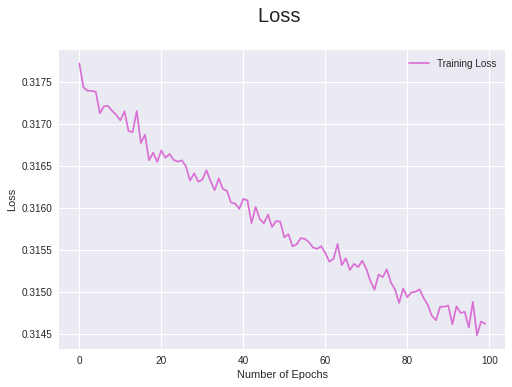

In [26]:
# Model Loss Graph
plt.style.use('seaborn')
plt.title('Loss \n',fontsize=20)
plt.plot(fit_model.history['loss'], 'orchid', label='Training Loss')
# plt.plot(fit_model.history['val_loss'],'royalblue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()